# 사용 파이썬 점검

In [1]:
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import site
site.getsitepackages()

['c:\\Users\\102\\anaconda3', 'c:\\Users\\102\\anaconda3\\lib\\site-packages']

## 판다스로 구현하는 연령별 인구구조 유사지역

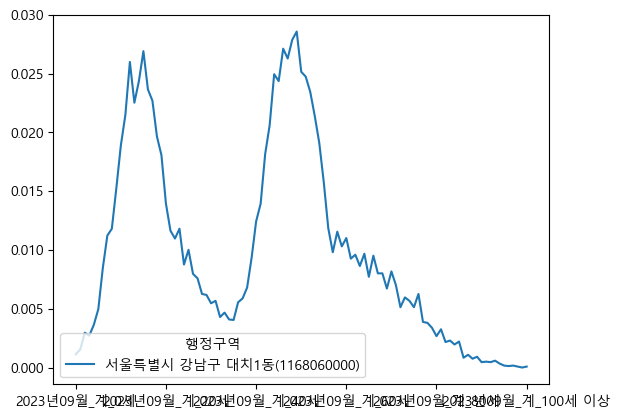

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
df = df.replace(',', '', regex=True)

df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

df = df.div(df['2023년09월_계_총인구수'], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') #2. 지역 이름 입력

a = df.index.str.contains(name) #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]

# plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
df2.T.plot()
plt.show()

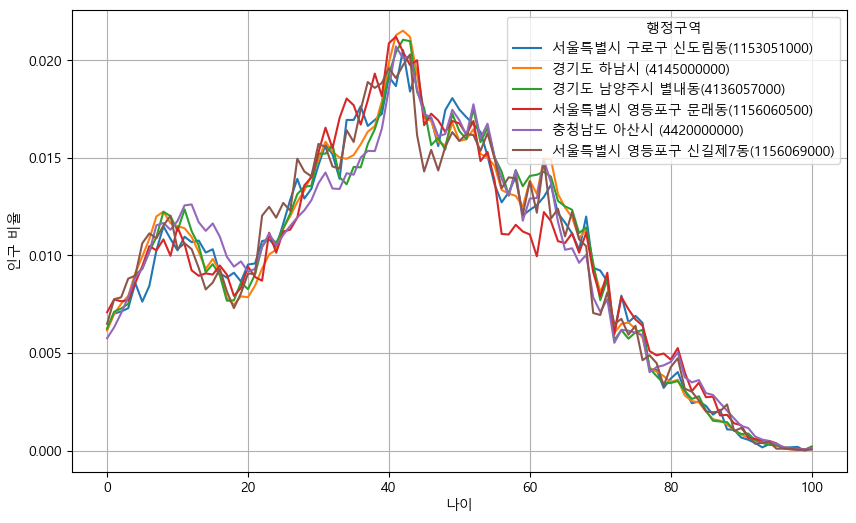

In [4]:
# 전체 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') # 원하는 지역 이름 입력
df2 = df[df.index.str.contains(name)] #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장

# 특정 지역의 인구를 빼고 
x = df.sub(df2.iloc[0], axis='columns')
y = np.power(x, 2) # 차의 제곱을 연산 
z = y.sum(axis='columns') # 결과는 시리즈로 인덱스가 행정 구역
i = z.sort_values().index[:6] # 차의 제곱이 가장 작은 6개 선택

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df.columns = range(101)
df.loc[i].T.plot(figsize=(10, 6))
plt.xlabel('나이')
plt.ylabel('인구 비율')
plt.grid(True)
plt.show()

## 2023-2 기말고사 힌트

In [7]:
'인천' in '경기도 인천시 남구'

True

In [8]:
'경기도 인천시 남구' in '인천' 

False

In [9]:
import numpy as np
import pandas as pd 

In [14]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [15]:
type(np.arange(1, 5, 0.5))

numpy.ndarray

In [20]:
s = pd.Series(['java', '2', '3'])
s

0    java
1       2
2       3
dtype: object

In [24]:
s[2]

'3'

In [28]:
np.linspace(0, 5, 5)[-1]

5.0

In [27]:
type(np.linspace(0, 5, 5))

numpy.ndarray

## 난수

In [60]:
np.random.randint(3)

2

## pandas DataFrame

In [61]:
df = pd.DataFrame(np.arange(12).reshape(3, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [62]:
df.columns = list('ABCD')
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [64]:
df.index = list('abc')
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [72]:
df.iloc[1:, 1]

b    5
c    9
Name: B, dtype: int32

In [68]:
type(df.iloc[1:, 1])

pandas.core.series.Series

In [73]:
df.to_numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [74]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [75]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [76]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [77]:
d = np.arange(10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
cond = d > 5
cond

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [79]:
d[cond]

array([6, 7, 8, 9])

## map()

In [81]:
s = ['34', '1999', '2786', '1000000']
result = map(int, s)
list(result)

[34, 1999, 2786, 1000000]

## scatter()

(0.0, 6.0)

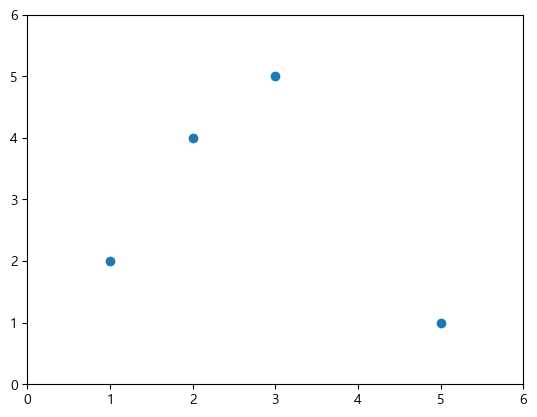

In [83]:
import matplotlib.pyplot as plt

x = [5, 3, 1, 2]
y = [1, 5, 2, 4]
plt.scatter(x, y)
plt.xlim(0, 6)
plt.ylim(0, 6)

In [85]:
x = np.arange(1, 5, .5)
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

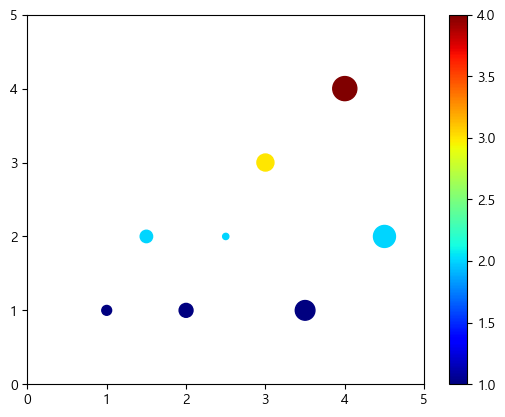

In [89]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 5, .5)
y = np.random.randint(1, 5, 8)
size = [50, 80, 100, 20, 150, 200, 300, 250]
plt.scatter(x, y, s=size, c=y, cmap='jet')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.colorbar()
plt.show()